Epoch 1/50


c:\Users\MADHU\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4167 - loss: 0.6947 - val_accuracy: 1.0000 - val_loss: 0.6897
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2500 - loss: 0.7064 - val_accuracy: 1.0000 - val_loss: 0.6761
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5000 - loss: 0.7068 - val_accuracy: 1.0000 - val_loss: 0.6629
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4167 - loss: 0.6862 - val_accuracy: 1.0000 - val_loss: 0.6504
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7500 - loss: 0.6631 - val_accuracy: 1.0000 - val_loss: 0.6385
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5833 - loss: 0.6807 - val_accuracy: 1.0000 - val_loss: 0.6266
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6667 - loss: 0.6350 - val_accuracy: 1.0000 - val_loss: 0.6151
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7500 - loss: 0.6641 - val_accuracy: 1.0000 - val_loss: 0.6040
Epoch 9/50
1/

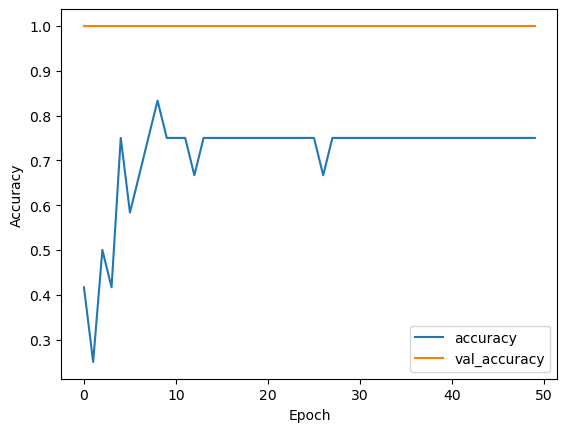

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('Avian Influenza (HPAI)edit.csv')

# Display the first few rows of the dataset
df.head()

# Preprocessing
# Assuming you want to use 'Latitude', 'Longitude', 'Year', 'Month', 'Day', and 'Time' as features
# Convert 'Time' to a numerical value (e.g., minutes since midnight)
df['Time'] = pd.to_datetime(df['Time'], format='%H%M').dt.hour * 60 + pd.to_datetime(df['Time'], format='%H%M').dt.minute

# Select features and target
X = df[['Latitude', 'Longitude', 'Year', 'Month', 'Day', 'Time']]
y = df['target_H5_HPAI']

# Encode labels if necessary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for RNN input (assuming sequences of length 6, one for each feature)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  # (samples, time steps, features)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the RNN model
model = Sequential()

# Add a SimpleRNN layer
model.add(SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))

# Add a Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Add a Dense output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()